to-do:
1. remove outliers from numercials
2. give order to label encoded
3. use the nice way to concat the two and use the drop_first = True + drop rows if have na's (X.isna().any())
        X = pd.concat([pd.get_dummies(X[categoricalX.columns],drop_first=True),
               remove_outliers(X[numericalX.columns])],axis=1)
        na_idcs = X[X.isna().any(axis=1)].index
        X = pd.DataFrame(X).drop(na_idcs)
        y = pd.DataFrame(y).drop(na_idcs)
        
4. mark all features that are not statistically significant (check the p-value)
5. make graphics of the data even before modelling
6. clean up the notebook and make relevant, contexting notes
7. get the correlation metrics, there are three corr(), heatmap and some pairplot
    6.a. learn how to scatterplot fast -> 
        plt.scatter(x=hk_df['med_fam_income'], y = hk_df['avg_household_income'],c = 'g')
        plt.show()
    6.b. remove highly correlated columns
8. make the distribution plots for each numerical and give comments
    sns.distplot((hk_df['median_home_val']), bins=20)
9. use seaborn
10. make sure to understand which libraries have been imported
11. learn how to use the other transformers (we use a power transformer to remove the skew and rescale the data to have zero mean and unit variance)
12. what is this reshape doing and when to not forget it
13. what hypothesis test one might come up with 
14. see what else we did in week 2 (pandas) and week 4 (modelling)



In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import statistics as st
import random
import sklearn
import statsmodels.api as sma
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE  ## recursive feature elemination technique
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import data

In [2]:
df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [4]:
df = df.drop('effective_to_date', axis = 1)

In [5]:
numericals = df.select_dtypes(np.number)
categoricals = df.select_dtypes(np.object)

/var/folders/wq/2vxkh_6d4g7dpxkr5q82nxzh0000gn/T/ipykernel_80752/3149187810.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(np.object)


# Preprocessing

### Check correlation

In [6]:
df.corr()
# no high correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


### Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categoricals.coverage = le.fit_transform(categoricals.coverage)
categoricals.education = le.fit_transform(categoricals.education)
categoricals.vehicle_class = le.fit_transform(categoricals.vehicle_class)
categoricals.vehicle_size = le.fit_transform(categoricals.vehicle_size)

### Hot Encoding

In [8]:
categoricals = pd.get_dummies(categoricals, prefix = ['month', 'region','response', 'employment_status', 'gender', 'location_code', 'policy_type', 'marital_status','policy', 'renew_offer_type', 'sales_channel'], columns = ['month', 'region','response', 'employment_status', 'gender', 'policy_type', 'location_code', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel'], drop_first=False)

In [ ]:
categoricals

### Concatanation

In [9]:
df = pd.concat([categoricals, numericals], axis=1)

In [10]:
df

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,...,sales_channel_call center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,1,0,1,1,0,1,0,0,0,...,0,0,4809,48029,61,7,52,0,9,292
1,0,1,0,1,0,1,0,0,0,1,...,1,0,2228,92260,64,3,26,0,1,744
2,0,0,4,1,1,0,0,1,0,0,...,1,0,14947,22139,100,34,31,0,2,480
3,1,1,0,1,0,1,0,0,1,0,...,0,0,22332,49078,97,10,3,0,2,484
4,2,0,0,1,0,1,0,0,1,0,...,0,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,0,1,1,0,0,0,...,0,1,15563,61541,253,12,40,0,7,1214
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,5259,61146,65,7,68,0,6,273
10686,1,0,2,1,1,0,1,0,0,0,...,0,1,23893,39837,201,11,63,0,2,381
10687,2,1,4,1,1,0,0,0,0,1,...,0,0,11971,64195,158,0,27,4,6,618


In [11]:
# remove outliers
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_95 = np.percentile(df[c], 95)
            pct_5 = np.percentile(df[c], 5)
            upper_bound = pct_95 + 1.9*iqr(df[c])
            lower_bound = pct_5 - 1.9*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [12]:
remove_outliers(df)

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,...,sales_channel_call center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,1,0,NaN,1,0,1,NaN,0,0,...,NaN,NaN,4809.0,48029,61.0,7,52,NaN,NaN,292.0
1,0,1,0,NaN,0,1,0,NaN,0,1,...,NaN,NaN,2228.0,92260,64.0,3,26,NaN,1.0,744.0
2,0,0,4,NaN,1,0,0,NaN,0,0,...,NaN,NaN,14947.0,22139,100.0,34,31,NaN,2.0,480.0
3,1,1,0,NaN,0,1,0,NaN,1,0,...,NaN,NaN,NaN,49078,97.0,10,3,NaN,2.0,484.0
4,2,0,0,NaN,0,1,0,NaN,1,0,...,NaN,NaN,9025.0,23675,117.0,33,31,NaN,7.0,707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,NaN,0,1,1,NaN,0,0,...,NaN,NaN,15563.0,61541,NaN,12,40,NaN,7.0,NaN
10685,0,1,0,NaN,0,1,0,NaN,1,0,...,NaN,NaN,5259.0,61146,65.0,7,68,NaN,6.0,273.0
10686,1,0,2,NaN,1,0,1,NaN,0,0,...,NaN,NaN,NaN,39837,NaN,11,63,NaN,2.0,381.0
10687,2,1,4,NaN,1,0,0,NaN,0,1,...,NaN,NaN,11971.0,64195,158.0,0,27,NaN,6.0,618.0


In [ ]:
# if I use this function, a lot of NaN appear. Shall they then be removed?

# Model

### X-y split & train and test split 

In [12]:
# x-y split
X = df.drop('total_claim_amount', axis=1)
y = df.total_claim_amount

In [52]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

### Standardscaler on numericals

In [80]:
# scale train and test (fit & transform train; only transform test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # the standard scaler will only work with numericals
X_test_scaled = scaler.transform(X_test)

In [82]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.791027,-0.397739,-0.926953,-0.159821,1.066351,-1.066351,1.582545,-0.305058,-0.622378,-0.734295,...,-0.610610,-0.502630,-0.423535,0.095370,-0.386160,-0.297547,0.281758,1.496839,0.681837,-0.412329
1,2.316796,1.045463,-0.926953,-0.159821,-0.937778,0.937778,1.582545,-0.305058,-0.622378,-0.734295,...,-0.610610,-0.502630,-0.423535,-0.551390,-1.599334,0.455738,-0.998572,-0.512200,-0.420000,-0.829171
2,-0.734743,-1.119340,-0.926953,-0.159821,-0.937778,0.937778,-0.631893,-0.305058,1.606741,-0.734295,...,-0.610610,-0.502630,2.361079,-0.820850,-1.287884,-0.876997,0.675706,1.712093,-0.420000,-0.829171
3,-0.734743,-1.119340,-0.926953,-0.159821,-0.937778,0.937778,1.582545,-0.305058,-0.622378,-0.734295,...,-0.610610,-0.502630,2.361079,1.672013,-0.448579,-0.674190,1.266627,-0.799205,-0.420000,-0.412329
4,0.791027,1.045463,-0.926953,-2.028230,-0.937778,0.937778,-0.631893,3.278061,-0.622378,-0.734295,...,-0.610610,1.989535,-0.423535,-0.643972,-1.081909,-0.123712,0.380245,-1.265589,-0.420000,-0.829171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.791027,-0.397739,-0.926953,1.708588,1.066351,-1.066351,1.582545,-0.305058,-0.622378,-0.734295,...,1.637708,-0.502630,-0.423535,-0.057672,1.899259,0.021150,0.675706,0.635823,-0.420000,0.004513
7478,0.791027,-1.119340,1.375504,1.708588,1.066351,-1.066351,-0.631893,-0.305058,-0.622378,1.361850,...,-0.610610,-0.502630,-0.423535,3.950210,1.391213,0.137040,0.183271,1.066331,-0.420000,-0.412329
7479,-0.734743,1.767064,-0.926953,1.708588,1.066351,-1.066351,-0.631893,-0.305058,-0.622378,1.361850,...,-0.610610,-0.502630,-0.423535,-0.547321,-1.289097,-0.848025,1.069653,-1.444968,3.987348,2.088722
7480,-0.734743,1.045463,0.915013,-0.159821,-0.937778,0.937778,-0.631893,-0.305058,1.606741,-0.734295,...,1.637708,-0.502630,-0.423535,0.717133,1.024379,0.368821,0.774192,1.496839,-0.420000,-0.412329


In [86]:
# fit
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# predict
y_lr_train_pred =  pd.DataFrame(lr.predict(X_train_scaled), columns = ['total_claim_amount'])
y_lr_test_pred = pd.DataFrame(lr.predict(X_test_scaled), columns = ['total_claim_amount'])

In [87]:
# model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_train_ar2 = 1 - (1 - lr_train_r2) * (len(y_train) -1) / (len(y_train) - X_train.shape[1] - 1)
    # has X_train to be the scaled one?

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_test_ar2 = 1 - (1 - lr_test_r2) * (len(y_test) -1) / (len(y_test) - X_test.shape[1] - 1)


lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_test_mse, lr_train_mae, lr_test_mae, lr_train_r2, lr_test_r2, lr_train_ar2, lr_test_ar2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Test MSE', 'Training MAE', 'Test MAE', 'Training R2', 'Test R2', 'Training Ad. R2', 'Test Ad. R2']

lr_results
# error_train < error_test => model ok!

,Method,Training MSE,Test MSE,Training MAE,Test MAE,Training R2,Test R2,Training Ad. R2,Test Ad. R2
0,Linear Regression,20417.662524,18285.018915,97.296808,93.680911,0.763851,0.781047,0.763218,0.779673


In [81]:
import statsmodels.api as sm

X_train_const_ct = sm.add_constant(X_train_scaled) # adding a constant
model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)


X_test_const_ct = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     618.7
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        15:36:43   Log-Likelihood:                -47736.
No. Observations:                7482   AIC:                         9.555e+04
Df Residuals:                    7442   BIC:                         9.583e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.3067      1.655    261.831      0.0

## Visualisations

<Figure size 500x500 with 0 Axes>

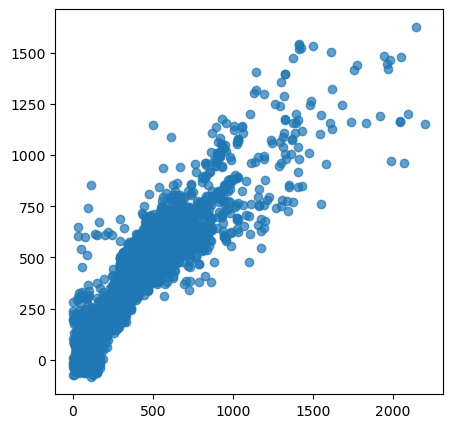

In [20]:
# scatterplot y_test, y_pred
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_lr_test_pred, alpha = 0.7)

<AxesSubplot:>

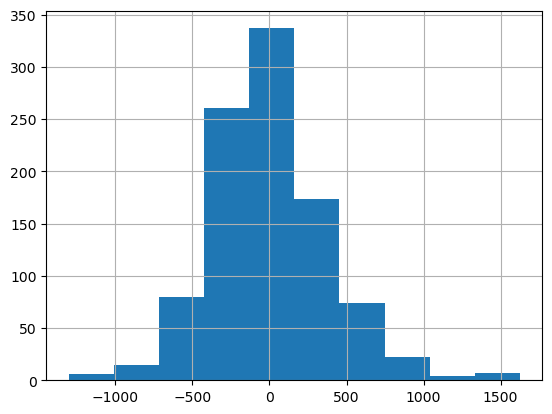

In [21]:
# histogram residuals
residuals = y_test - y_lr_test_pred.total_claim_amount
residuals.hist()

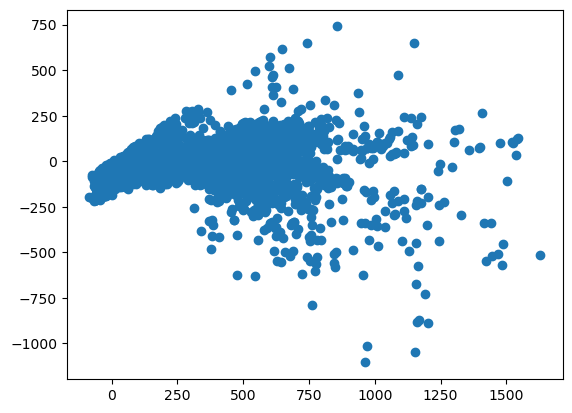

In [22]:
# scatterplot residuals
y_test = y_test.to_numpy().reshape(-1,1)

residuals_error = y_lr_test_pred.to_numpy() - y_test
plt.scatter(y_lr_test_pred, residuals_error)

In [23]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(lr.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
20,location_code_personal auto,2.179392e+15
4,month_feb,2.085248e+15
5,month_jan,2.085248e+15
19,location_code_corporate auto,1.788060e+15
18,gender_m,1.683881e+15
17,gender_f,1.683881e+15
26,marital_status_married,9.682689e+14
13,employment_status_employed,8.763622e+14
27,marital_status_single,8.739914e+14
16,employment_status_unemployed,7.908007e+14


<BarContainer object of 50 artists>

Text(0.5, 1.0, 'Feature importance rankings')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

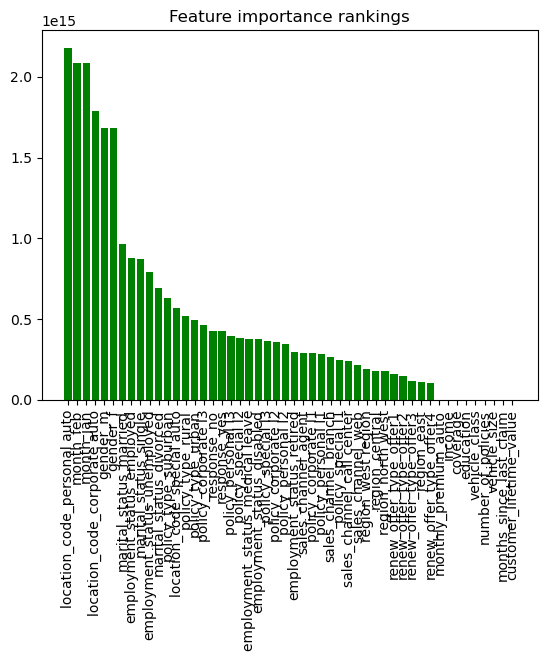

In [24]:
plt.bar(x=features_importances['Attribute'].iloc[:50], height=features_importances['Importance'].iloc[:50], color='green')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

## Feature Selection techniques

### Lasso

In [27]:
from sklearn.linear_model import Lasso,Ridge

In [39]:
model=Lasso(alpha=0)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

/var/folders/wq/2vxkh_6d4g7dpxkr5q82nxzh0000gn/T/ipykernel_80752/288729415.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/dmitrir./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/dmitrir./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.625e+07, tolerance: 6.469e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mo

Lasso(alpha=0)

Lasso: Train -> 0.7642691126387628, Test -> 0.7816089926137985


### Ridge

In [40]:
model=Ridge(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge(alpha=0.1)

Ridge: Train -> 0.7642691115159093, Test -> 0.781609337177733


### RFE

In [88]:
selector = RFE(lr, n_features_to_select= 20, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train_scaled, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train_scaled.iloc[:,kept_features].columns)

X_train = selector.transform(X_train_scaled)
X_test  = selector.transform(X_test_scaled)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

RFE(estimator=LinearRegression(), n_features_to_select=20, verbose=1)

Final selected features: 


,employment_status_disabled,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,location_code_corporate auto,location_code_special auto,marital_status_divorced,marital_status_married,marital_status_single,policy_corporate l1,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web
0,-0.217177,-1.289431,-0.217851,-0.170351,1.700234,1.897756,-0.206148,-0.413169,-1.179159,1.633844,-0.20438,3.832171,-0.357766,-0.400225,-0.548420,-0.770681,1.292007,-0.610610,-0.502630,-0.423535
1,4.604539,-1.289431,-0.217851,-0.170351,-0.588154,-0.526938,-0.206148,-0.413169,0.848062,-0.612054,-0.20438,-0.260949,-0.357766,2.498596,-0.548420,-0.770681,1.292007,-0.610610,-0.502630,-0.423535
2,4.604539,-1.289431,-0.217851,-0.170351,-0.588154,-0.526938,-0.206148,2.420316,-1.179159,-0.612054,-0.20438,-0.260949,-0.357766,-0.400225,1.823419,-0.770681,-0.773989,-0.610610,-0.502630,2.361079
3,-0.217177,-1.289431,-0.217851,-0.170351,1.700234,1.897756,-0.206148,-0.413169,-1.179159,1.633844,-0.20438,-0.260949,2.795124,-0.400225,-0.548420,-0.770681,-0.773989,-0.610610,-0.502630,2.361079
4,-0.217177,0.775536,-0.217851,-0.170351,-0.588154,1.897756,-0.206148,-0.413169,0.848062,-0.612054,-0.20438,-0.260949,2.795124,-0.400225,-0.548420,-0.770681,-0.773989,-0.610610,1.989535,-0.423535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,-0.217177,0.775536,-0.217851,-0.170351,-0.588154,-0.526938,-0.206148,-0.413169,0.848062,-0.612054,-0.20438,-0.260949,-0.357766,2.498596,-0.548420,-0.770681,-0.773989,1.637708,-0.502630,-0.423535
7478,-0.217177,0.775536,-0.217851,-0.170351,-0.588154,1.897756,-0.206148,2.420316,-1.179159,-0.612054,-0.20438,-0.260949,2.795124,-0.400225,-0.548420,-0.770681,1.292007,-0.610610,-0.502630,-0.423535
7479,-0.217177,-1.289431,4.590294,-0.170351,-0.588154,-0.526938,-0.206148,2.420316,-1.179159,-0.612054,-0.20438,-0.260949,-0.357766,-0.400225,-0.548420,1.297553,1.292007,-0.610610,-0.502630,-0.423535
7480,-0.217177,0.775536,-0.217851,-0.170351,-0.588154,-0.526938,-0.206148,-0.413169,0.848062,-0.612054,-0.20438,-0.260949,-0.357766,-0.400225,1.823419,-0.770681,-0.773989,1.637708,-0.502630,-0.423535


In [89]:
# model performance
lr=LinearRegression()
lr.fit(X_train, y_train)

lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_train_ar2 = 1 - (1 - lr_train_r2) * (len(y_train) -1) / (len(y_train) - X_train.shape[1] - 1)

lr_results = pd.DataFrame(['Linear Regression', lr_train_r2]).transpose()
lr_results.columns = ['Method', 'Training R2']

lr_results

LinearRegression()

,Method,Training R2
0,Linear Regression,0.763851


In [ ]:
# off-topic

# df['region'] = df['region'].cat.rename_categories({'central': 0, 'west region': 1, 'east': 2, 'north west': 3})
# categoricals = df.select_dtypes(include=['category'])
# for col in df.columns:
#    if df[col].dtype == 'category':
#        df[col] = le.fit_transform(df[col])
# change categories quickly
# for col in ['region', 'response', 'coverage',
#       'education', 'month', 'employment_status',
#       'gender', 'location_code', 'marital_status',
#       'policy_type', 'policy', 'renew_offer_type',
#       'sales_channel', 'vehicle_class', 'vehicle_size']: df[col] = df[col].astype('category')